In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

In [3]:
frame = pd.read_csv('features.csv')

In [4]:
frame.head()

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Duration,Number_Partials,Zero_Crossings,Species,Sex,Age,Call
0,0.083313,0.015951,848.0,10.000000,1,2,706,A. jubatus,NaN,A,growl
1,0.296424,0.035485,3645.5,9.750000,4,21,3456,A. jubatus,NaN,A,NaN
2,0.171860,0.022913,2181.8,10.400000,5,8,2984,A. jubatus,NaN,A,growl
3,0.243933,0.023587,3437.0,10.600000,5,11,3108,A. jubatus,NaN,A,NaN
4,0.194653,0.029304,2189.0,10.333333,3,5,1919,A. jubatus,NaN,A,growl


In [5]:
frame['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'call', 'unknown',
       'growl/hiss', 'call sequence', 'purr', 'purr sequence', 'Growl',
       'Hiss', 'Loud rumble/roar', 'Sharp Hiss', 'call?', 'roar',
       'roar or call', 'growl ', 'roar?', 'main call', 'call/growl'],
      dtype=object)

In [6]:
frame.dtypes

Amp_range          float64
Avg_amp            float64
Freq_range         float64
Pulses_per_Sec     float64
Duration             int64
Number_Partials      int64
Zero_Crossings       int64
Species             object
Sex                 object
Age                 object
Call                object
dtype: object

In [7]:
frame.shape

(345, 11)

In [8]:
clean = {'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 'Sharp Hiss':'hiss','unknown':np.NaN, 'purr sequence': 'purr',
        'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar'}

In [9]:
clean2 = {'A':'Adult','Adult ':'Adult', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile'}
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 'G (1 M and 2F)':'Group'}

In [10]:
frame.replace(clean, inplace = True)

In [11]:
frame.replace(clean2, inplace = True)

In [12]:
frame.replace(clean3, inplace = True)

In [13]:
frame['Sex'].fillna('Unknown', inplace = True)
frame['Age'].fillna('Unknown', inplace = True)

In [14]:
frame['Call'].unique()

array(['growl', nan, 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl'], dtype=object)

In [15]:
frame['Age'].unique()

array(['Adult', 'Juvenile', 'Unknown'], dtype=object)

In [16]:
frame['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [17]:
frame.to_csv('cleaned.csv', index=False)

In [18]:
train = frame.loc[pd.notna(frame['Call'])]

In [19]:
train['Call'].unique()

array(['growl', 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl'], dtype=object)

In [20]:
x = train.iloc[:, 0:10]
y = train.iloc[:, 10]

In [21]:
x_dummies = pd.get_dummies(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size = 0.30)

In [23]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')

In [24]:
clf = XGBClassifier(**parameters, n_estimators=1200)

In [25]:
y_train.unique()

array(['growl', 'call', 'hiss', 'roar', 'purr', 'call/growl'],
      dtype=object)

In [26]:
x.dtypes

Amp_range          float64
Avg_amp            float64
Freq_range         float64
Pulses_per_Sec     float64
Duration             int64
Number_Partials      int64
Zero_Crossings       int64
Species             object
Sex                 object
Age                 object
dtype: object

In [27]:
clf.fit(x_train, y_train)

C:\Users\njfur\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [28]:
y_pred = clf.predict(x_test)

In [29]:
clf.score(x_train, y_train)

1.0

In [30]:
clf.score(x_test,y_test)

0.83

In [31]:
np.unique(y_pred)

array(['call', 'growl', 'hiss', 'purr', 'roar'], dtype=object)

In [32]:
np.unique(y_test)

array(['call', 'call/growl', 'growl', 'growl/hiss', 'hiss', 'purr',
       'roar'], dtype=object)

In [33]:
np.unique(y_train)

array(['call', 'call/growl', 'growl', 'hiss', 'purr', 'roar'],
      dtype=object)

In [34]:
gnb = GaussianNB()

In [35]:
gnb.fit(x_train, y_train)

GaussianNB()

In [36]:
y_pred_nb = gnb.predict(x_test)

In [37]:
gnb.score(x_test, y_test)

0.47

In [38]:
clf_svc = SVC()

In [39]:
clf_svc.fit(x_train, y_train)

SVC()

In [40]:
y_pred_svc=clf_svc.predict(x_test)

In [41]:
clf_svc.score(x_test, y_test)

0.63

In [42]:
y_pred

array(['call', 'growl', 'growl', 'growl', 'call', 'roar', 'call', 'growl',
       'growl', 'call', 'growl', 'growl', 'growl', 'hiss', 'growl',
       'call', 'call', 'growl', 'hiss', 'growl', 'growl', 'purr', 'growl',
       'growl', 'call', 'growl', 'hiss', 'growl', 'growl', 'call',
       'growl', 'growl', 'growl', 'growl', 'growl', 'roar', 'call',
       'call', 'growl', 'growl', 'growl', 'growl', 'growl', 'purr',
       'call', 'growl', 'call', 'growl', 'growl', 'growl', 'growl',
       'growl', 'call', 'call', 'growl', 'growl', 'growl', 'growl',
       'growl', 'growl', 'call', 'growl', 'growl', 'growl', 'growl',
       'growl', 'call', 'growl', 'call', 'growl', 'growl', 'growl',
       'call', 'growl', 'growl', 'hiss', 'growl', 'hiss', 'growl', 'call',
       'growl', 'growl', 'growl', 'growl', 'growl', 'growl', 'growl',
       'growl', 'growl', 'growl', 'growl', 'growl', 'growl', 'growl',
       'growl', 'growl', 'call', 'call', 'growl', 'growl'], dtype=object)

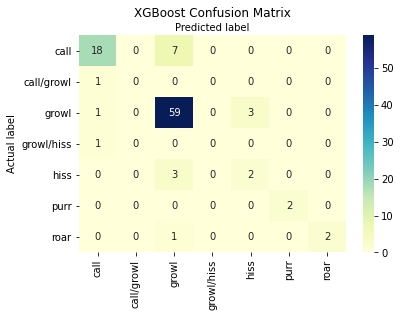

In [50]:
names = ['call', 'call/growl','growl','growl/hiss','hiss','purr', 'roar']
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

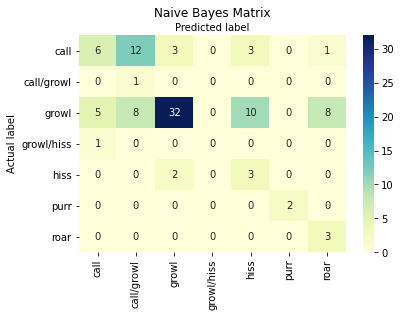

In [51]:
cnf = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('Naive Bayes Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

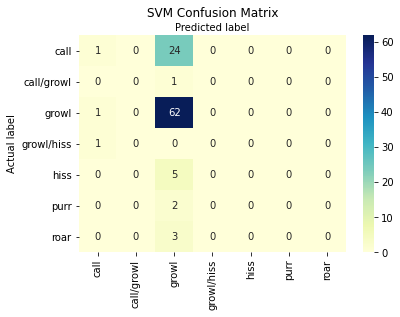

In [52]:
cnf = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
#The data is unbalanced, this could be fixed by updating the class weights 
#Or getting more varied data

In [47]:
frame['Call'].value_counts()

growl         198
call           79
hiss           26
roar           12
purr           11
call/growl      4
growl/hiss      1
Name: Call, dtype: int64